In [1]:
import kagglehub
import os

import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

# Download latest version
path = kagglehub.dataset_download("anandshaw2001/netflix-movies-and-tv-shows")

print("Path to dataset files:", path)

dataset_folder_path = '/content/drive/MyDrive/Datasets'
netflix_dataset_folder_path = os.path.join(dataset_folder_path,'netflix movies and tvshow')
os.makedirs(netflix_dataset_folder_path, exist_ok=True)

for file in os.listdir(path):
    shutil.move(os.path.join(path,file),os.path.join(netflix_dataset_folder_path,file))

print(f'dataset downloaded to this path {netflix_dataset_folder_path}')

Path to dataset files: /root/.cache/kagglehub/datasets/anandshaw2001/netflix-movies-and-tv-shows/versions/1
dataset downloaded to this path /content/drive/MyDrive/Datasets/netflix movies and tvshow


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/netflix movies and tvshow/netflix_titles.csv')

In [4]:
df.shape

(8807, 12)

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [9]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


<ipython-input-16-607495781593>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


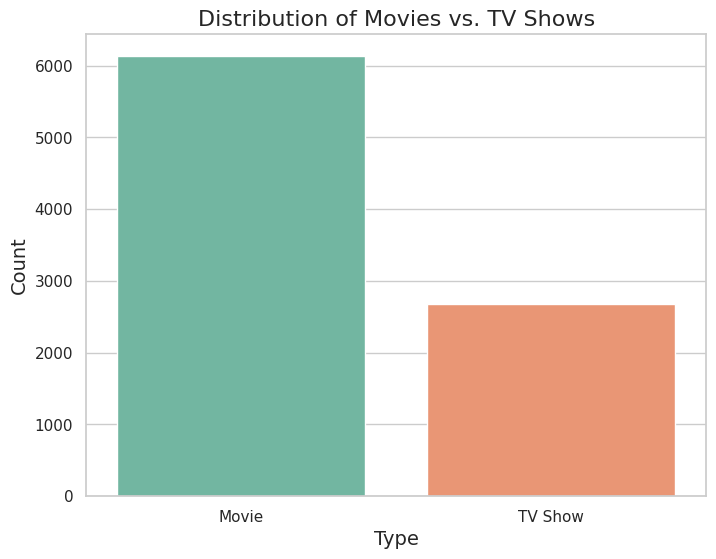

In [16]:

# Set style for plots
sns.set(style="whitegrid")

# 1. Distribution of Movies vs. TV Shows
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Distribution of Movies vs. TV Shows', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


<ipython-input-17-6ef818faeb6f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')


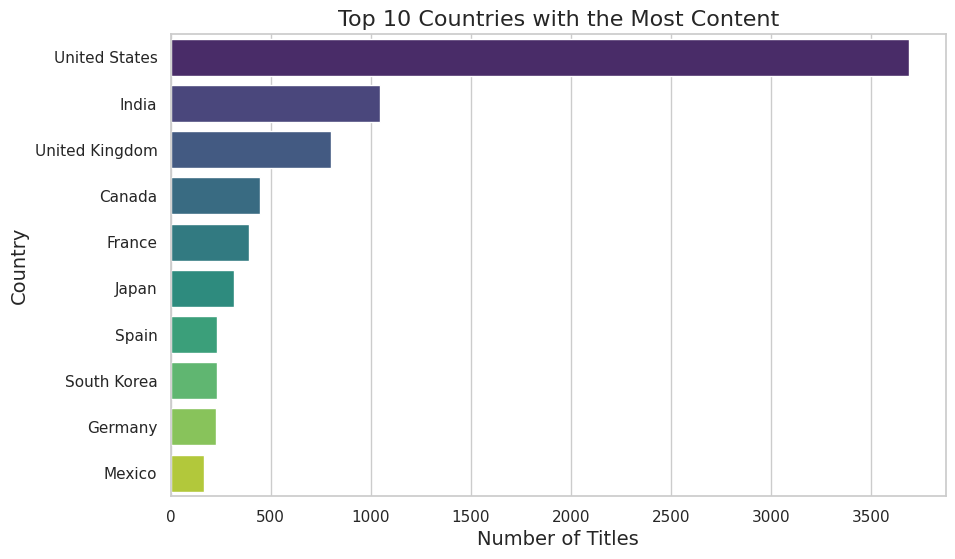

In [17]:
# 2. Top Countries with the Most Content
# Split countries and count occurrences
country_counts = df['country'].str.get_dummies(sep=', ').sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Top 10 Countries with the Most Content', fontsize=16)
plt.xlabel('Number of Titles', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.show()


<ipython-input-18-e4867e99d75b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='Set3')


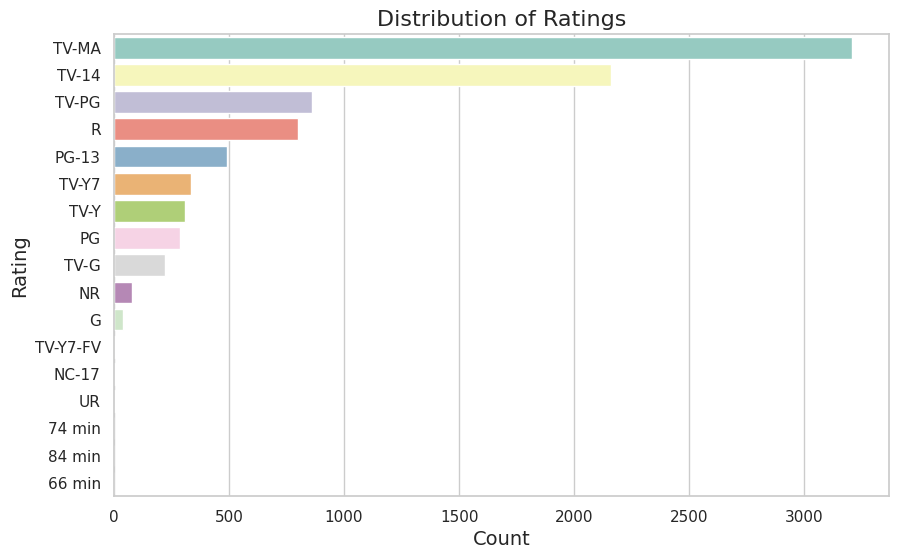

In [18]:

# 3. Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='Set3')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.show()


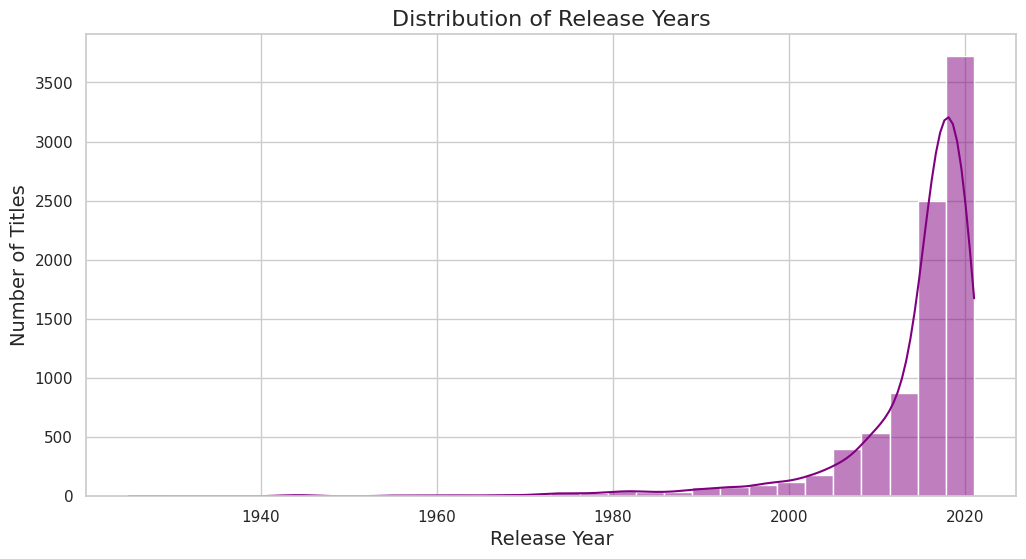

In [19]:

# 4. Release Year Trends
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'], bins=30, kde=True, color='purple')
plt.title('Distribution of Release Years', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.show()


<ipython-input-20-eabaa4a9cb10>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='magma')


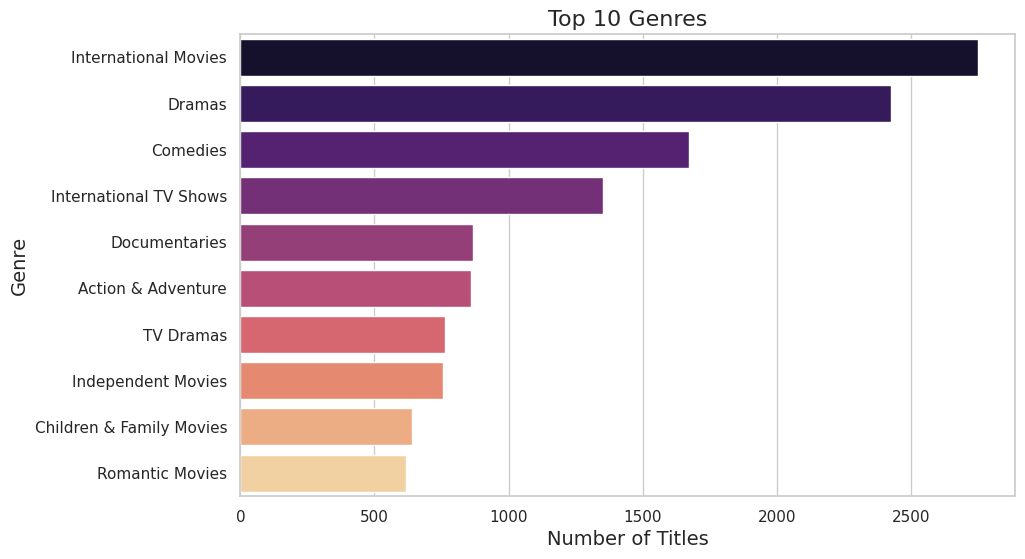

In [20]:
# 5. Top Genres
# Split genres and count occurrences
genre_counts = df['listed_in'].str.get_dummies(sep=', ').sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='magma')
plt.title('Top 10 Genres', fontsize=16)
plt.xlabel('Number of Titles', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.show()

In [10]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

<ipython-input-10-c16dc916dc38>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
<ipython-input-10-c16dc916dc38>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [11]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,4
duration,3


In [12]:
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [21]:


# Verify if 'type' column exists
if 'type' in df.columns:
    print("Column 'type' exists!")
else:
    print("Column 'type' is missing. Check the dataset.")

# If the column exists, proceed with classification
if 'type' in df.columns:
    # Prepare features and target
    X = df[['release_year', 'duration', 'country', 'rating']]
    y = df['type']

    # Encode categorical features
    X = pd.get_dummies(X, drop_first=True)

    # Encode target variable if necessary (e.g., 'Movie' -> 0, 'TV Show' -> 1)
    le = LabelEncoder()
    y = le.fit_transform(y)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Support Vector Machine": SVC(random_state=42),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "Naive Bayes": GaussianNB()
    }

    # Dictionary to store results
    results = {
        'Model': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1-Score': []
    }

    # Train and evaluate each model
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Append results to dictionary
        results['Model'].append(model_name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-Score'].append(f1)

        # Print results
        print(f"{model_name} Metrics:")
        print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
        print("-" * 50)

    # Convert results dictionary to DataFrame
    results_df = pd.DataFrame(results)
    print("\nResults DataFrame:")
    print(results_df)

else:
    print("Cannot proceed without the 'type' column.")

Column 'type' exists!


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
Accuracy: 0.9790, Precision: 0.9790, Recall: 0.9790, F1-Score: 0.9790
--------------------------------------------------
Decision Tree Metrics:
Accuracy: 0.8678, Precision: 0.8957, Recall: 0.8678, F1-Score: 0.8719
--------------------------------------------------
Random Forest Metrics:
Accuracy: 0.9296, Precision: 0.9403, Recall: 0.9296, F1-Score: 0.9312
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Support Vector Machine Metrics:
Accuracy: 0.6890, Precision: 0.4747, Recall: 0.6890, F1-Score: 0.5621
--------------------------------------------------
K-Nearest Neighbors Metrics:
Accuracy: 0.6617, Precision: 0.8109, Recall: 0.6617, F1-Score: 0.6690
--------------------------------------------------
Gradient Boosting Metrics:
Accuracy: 0.8116, Precision: 0.8361, Recall: 0.8116, F1-Score: 0.7864
--------------------------------------------------
Naive Bayes Metrics:
Accuracy: 0.9932, Precision: 0.9932, Recall: 0.9932, F1-Score: 0.9932
--------------------------------------------------

Results DataFrame:
                    Model  Accuracy  Precision    Recall  F1-Score
0     Logistic Regression  0.979001   0.978991  0.979001  0.978996
1           Decision Tree  0.867764   0.895710  0.867764  0.871884
2           Random Forest  0.929625   0.940330  0.929625  0.931165
3  Support Vector Machine  0.688990   0.474707  0.688990  0.562119
4     K-Nearest Neighbors  0.661748   0.810923  0.66

In [23]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.979001,0.978991,0.979001,0.978996
1,Decision Tree,0.867764,0.895710,0.867764,0.871884
2,Random Forest,0.929625,0.940330,0.929625,0.931165
3,Support Vector Machine,0.688990,0.474707,0.688990,0.562119
4,K-Nearest Neighbors,0.661748,0.810923,0.661748,0.669014
5,Gradient Boosting,0.811578,0.836130,0.811578,0.786432
6,Naive Bayes,0.993190,0.993215,0.993190,0.993196
